In [1]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
'''this script concate each block per subject to a file wihthin subject called s103_df_concat.csv'''

'''subsequently save a concatenante file under rechain-beh called all_df_concat.csv '''

'subsequently save a concatenante file under rechain-beh called all_df_concat.csv '

In [2]:
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
sns.set(style="whitegrid")

In [3]:
# top level dir 
# 

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')

list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))

In [4]:
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

/tmp/ipykernel_1459432/1494495760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_1459432/1494495760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [5]:

df = df[df['count'] != 0]
df = df[df['stimDur'] != 0.5]
df = df[df['stimDur'] != 0.05]
cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count'].to_numpy()

In [6]:
df

,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum
0,2.6166679859161377,2611,[1],10,0,0.25,0.12,[-1. 1. -1. 1. -1. 1. -1. -1. -1. -1. -1. ...,0,"[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, ...",s102,"[-1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, -2.0, ..."
1,2.2499890327453613,2233,[1],8,1,0.25,0.12,[-1. -1. -1. 1. 1. 1. 1. 1. -1. -1. -1. -...,0,"[-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1...",s102,"[-1.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, ..."
2,2.1333320140838623,2118,[1],8,0,0.25,0.12,[ 1. -1. -1. -1. 1. 1. -1. -1. -1. -1. 1. ...,0,"[1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, ...",s102,"[1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -1.0, -2.0, ..."
3,1.2833738327026367,1270,[1],5,1,0.25,0.12,[ 1. 1. 1. 1. -1. 1. 1. -1. -1. -1. 1. -...,0,"[1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1....",s102,"[1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 3.0, ..."
4,2.3333139419555664,2318,[1],9,1,0.25,0.12,[-1. 1. -1. 1. 1. -1. 1. 1. 1. -1. -1. -...,0,"[-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1....",s102,"[-1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.3166489601135254,2308,[1],23,0,0.10,0.12,[-1. 1. 1. -1. -1. -1. -1. 1. 1. -1. -1. -...,9,"[-1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, ...",s113,"[-1.0, 0.0, 1.0, 0.0, -1.0, -2.0, -3.0, -2.0, ..."
996,2.599961996078491,2590,[1],25,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. 1. -1. -1. -1. ...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, 0.0, -1.0..."
997,2.2333149909973145,2225,[1],22,0,0.10,0.12,[ 1. 1. -1. 1. -1. -1. -1. -1. 1. 1. -1. -...,9,"[1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, ...",s113,"[1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, -2.0, -1...."
998,2.3499770164489746,2342,[1],23,0,0.10,0.12,[-1. 1. -1. -1. -1. -1. -1. 1. -1. 1. 1. -...,9,"[-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0,...",s113,"[-1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -4.0..."


In [7]:
# calculate first occurence of max evidene

maxval = []
maxind = []
sequence_stopAll = []
bound = []
boundind = []
nummax = []
binary_seq_all = np.zeros_like(cumsum)
binary_seq_all.fill(np.nan)
for c in range(cumsum.shape[0]):
    binary_seq_all[c, : int(count[c])] = sequence[c, : int(count[c])]
    sequence_stop = cumsum[
        c, : int(count[c])
    ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
    sequence_stopAll.append(sequence_stop)
    bound.append(sequence_stop[-1])
    boundind.append(len(sequence_stop) - 1)
    maxindtrial = np.where(np.abs(sequence_stop) == np.max(abs(sequence_stop)))[0]
    maxind.append(maxindtrial)
    maxval.append(sequence_stop[maxindtrial])
    nummax.append(len(maxindtrial))

In [8]:
binary_seq_all

array([[-1.,  1., -1., ..., nan, nan, nan],
       [-1., -1., -1., ..., nan, nan, nan],
       [ 1., -1., -1., ..., nan, nan, nan],
       ...,
       [ 1.,  1., -1., ..., nan, nan, nan],
       [-1.,  1., -1., ..., nan, nan, nan],
       [-1., -1., -1., ..., nan, nan, nan]])

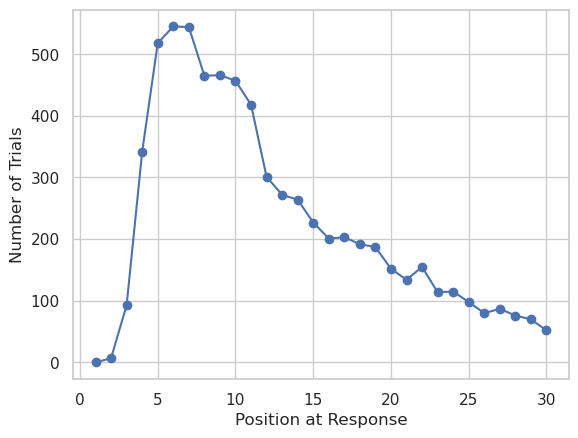

In [9]:
nancount = np.isnan(binary_seq_all).sum(axis=1)
nTrials = []
for t in range(0, 30):
    threshold = t

    dataset = binary_seq_all[nancount == 30 - threshold, :]
    dataset = dataset[:, 0:threshold]
    nTrials.append(dataset.shape[0])
plt.plot(np.arange(1, 31), np.array(nTrials), "o-")
plt.xlabel("Position at Response")
plt.ylabel("Number of Trials")


# 
binary_seq_all = binary_seq_all.cumsum(axis=1)   # cumsum model

# make the chain same direction for the correct trials

binary_seq_all[df['key'] == 0] = (-1)* binary_seq_all[df['key'] == 0] 


0.6683538787787258
0.6820218067434791
0.6493236636245111
0.6493236636245111


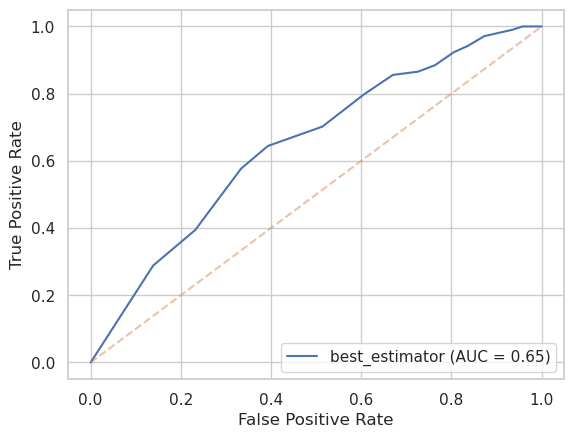

0.6608070665160085
0.676590761661654
0.6454197102143455
0.6454197102143455


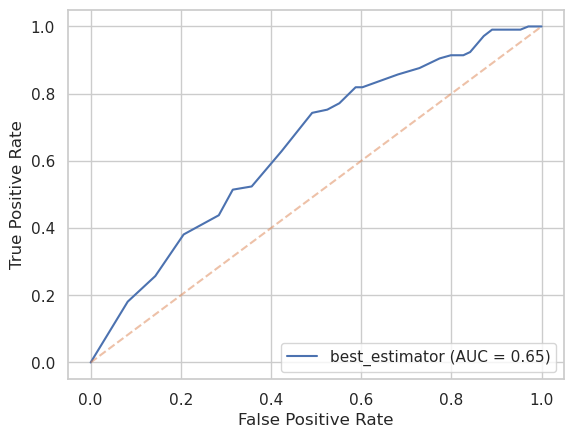

0.6902169154456133
0.6699329591518552
0.6913314967860422
0.6913314967860422


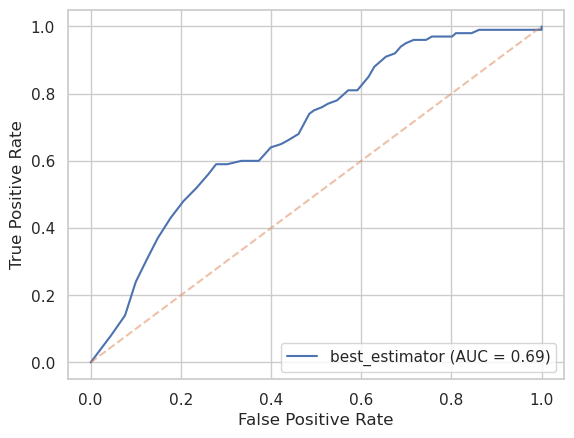

0.6504755480607083
0.6906887426765103
0.7192696192696192
0.7192696192696192


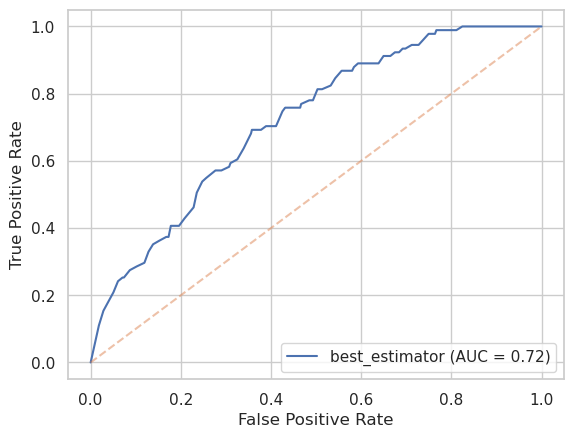

0.6882474555155629
0.6542587667344613
0.62667640419599
0.62667640419599


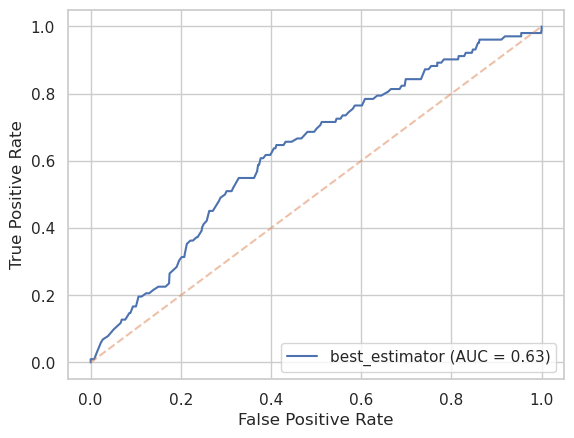

0.6263694024159718
0.6441947565543071
0.6240893221790396
0.6240893221790396


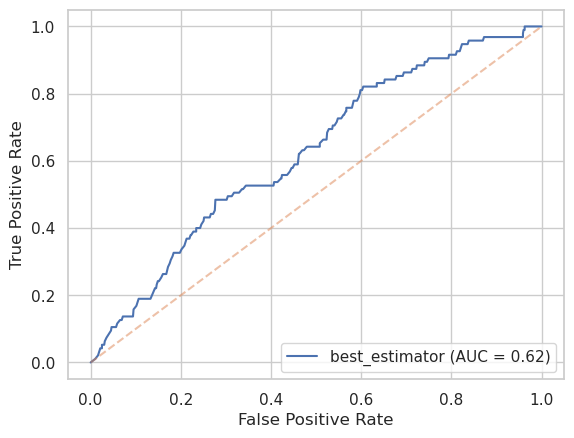

0.6000361613351878
0.5793849220225191
0.5596733075252573
0.5596733075252573


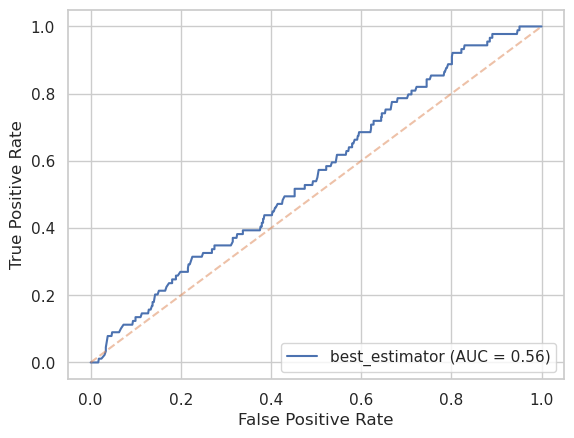

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

FPR =[]
TPR = []
AUC = [] 
THRESHOLD = []
SIZE = []
COEF = []
for threshold in [4,5,6,7,8,9,10]:

    # model_type="truth"
    # if model_type ==  "truth":
    #     dataset_resp = dataset.sum(axis=1) >0
    model_type = "continue"
    if model_type == "continue":
        dataset = binary_seq_all[nancount <= 30 - threshold, :]
        dataset_resp = np.isnan(
            dataset[:, threshold]
        )  # True means they stopped, false means they kept going
        dataset = dataset[:, :threshold]
        
        # train test val split
    x_train, x_test, y_train, y_test = train_test_split(
        dataset, dataset_resp, test_size=0.2, random_state=1
    )
    x_train, x_val, y_train, y_val = train_test_split(
        x_train, y_train, test_size=0.25, random_state=1
    )
 
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    from sklearn.linear_model import LogisticRegression
    mymodel=LogisticRegression(fit_intercept=True)

    mymodel.fit(x_train,y_train)


    y_pred_prob_train = mymodel.predict_proba(x_train)
    y_pred_prob_val = mymodel.predict_proba(x_val)

    y_pred_prob_test = mymodel.predict_proba(x_test)





    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_prob_train[:, 1])
    fpr_val, tpr_val, _ = metrics.roc_curve(y_val, y_pred_prob_val[:, 1])
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_prob_test[:, 1])
    auc_train = metrics.auc(fpr_train, tpr_train)
    auc_val = metrics.auc(fpr_val, tpr_val)
    auc_test = metrics.auc(fpr_test, tpr_test)
    print(auc_train)

    print(auc_val)
    print(auc_test)
    # results = mymodel.evals_result()
    # plt.plot(results["validation_0"]["logloss"])
    # plt.plot(results["validation_1"]["logloss"])
    # x_train.shape
    # booster: xgb.Booster = mymodel.get_booster()
    # xgb.plot_importance(booster, grid=True, importance_type="weight")
    scores = mymodel.predict_proba(x_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, scores[:, 1])

    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)
    fpr
    display = metrics.RocCurveDisplay(
        fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="best_estimator"
    )
    display.plot()
    plt.plot(np.linspace(0, 1), np.linspace(0, 1), "--", alpha=0.5)
    plt.show()
    
    features = list(range(0,threshold))
    features.append([0,1])
    
    FPR.append(fpr)
    TPR.append(tpr)
    AUC.append(roc_auc)
    THRESHOLD.append(threshold)
    SIZE.append(len(dataset))
    COEF.append(mymodel.coef_)
    
    # from sklearn.inspection import PartialDependenceDisplay
    # PartialDependenceDisplay.from_estimator(clf, x_train, features)
    # plt.gca()

In [69]:
COEF

[array([[-0.1759988 , -0.08827874,  0.34759649,  0.16790592]]),
 array([[ 0.00082383, -0.11089856, -0.05152952,  0.34434582,  0.05632578]]),
 array([[-0.01896714,  0.08848796,  0.08612587, -0.14077625,  0.25228663,
          0.11989156]]),
 array([[-0.16575822, -0.04938077,  0.09042987,  0.10714872,  0.17492829,
          0.0647218 , -0.06853812]]),
 array([[-0.07529457,  0.05424597, -0.13177696,  0.23846884,  0.2315585 ,
          0.03783998,  0.02781331, -0.07112471]]),
 array([[ 0.08859978, -0.07886432, -0.08786938, -0.01979685,  0.0907153 ,
          0.08017085, -0.02053751,  0.07641595,  0.03580452]]),
 array([[-0.11040676,  0.07851174, -0.10902028, -0.11018746,  0.17110023,
          0.00220351, -0.0631626 ,  0.1421399 ,  0.03903889, -0.02247153]])]

In [70]:
COEF[::-1]

[array([[-0.11040676,  0.07851174, -0.10902028, -0.11018746,  0.17110023,
          0.00220351, -0.0631626 ,  0.1421399 ,  0.03903889, -0.02247153]]),
 array([[ 0.08859978, -0.07886432, -0.08786938, -0.01979685,  0.0907153 ,
          0.08017085, -0.02053751,  0.07641595,  0.03580452]]),
 array([[-0.07529457,  0.05424597, -0.13177696,  0.23846884,  0.2315585 ,
          0.03783998,  0.02781331, -0.07112471]]),
 array([[-0.16575822, -0.04938077,  0.09042987,  0.10714872,  0.17492829,
          0.0647218 , -0.06853812]]),
 array([[-0.01896714,  0.08848796,  0.08612587, -0.14077625,  0.25228663,
          0.11989156]]),
 array([[ 0.00082383, -0.11089856, -0.05152952,  0.34434582,  0.05632578]]),
 array([[-0.1759988 , -0.08827874,  0.34759649,  0.16790592]])]

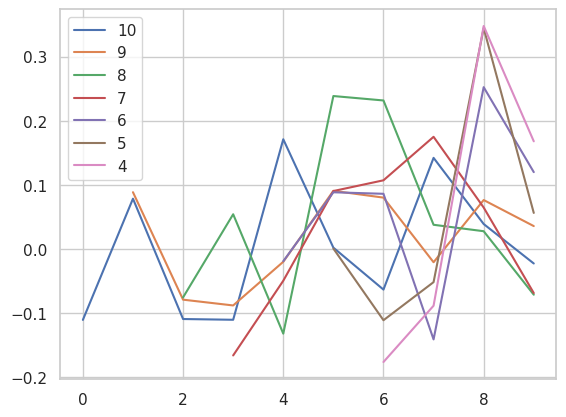

In [13]:
maxThresh = max(THRESHOLD)
for ind, j in enumerate(COEF[::-1]):
    plt.plot(np.arange(ind, maxThresh), j[0], label = str(len(j[0])))
plt.legend()
plt.show()


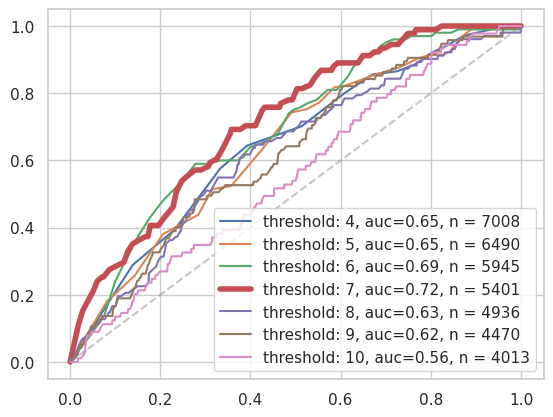

In [72]:

for i in range(len(FPR)):
    if i == np.argmax(AUC):
        plt.plot(FPR[i],TPR[i],label=f'threshold: {str(THRESHOLD[i])}, auc={np.round(AUC[i],2)}, n = {SIZE[i]}', linewidth = 4)
    else:
        plt.plot(FPR[i],TPR[i],label=f'threshold: {str(THRESHOLD[i])}, auc={np.round(AUC[i],2)}, n = {SIZE[i]}')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), "--", alpha=0.5)
# plt.title('AUC Curve for Classifying Termination or Continuition Using Cumsum')
plt.legend()
plt.show()

In [86]:
y_pred_prob_train[2].sum()

1.0

In [13]:
lr.coef_

NameError: name 'lr' is not defined

In [81]:
thresh


array([       inf, 0.20116212, 0.1889075 , 0.18854668, 0.18568007,
       0.18072209, 0.18037343, 0.17898031, 0.17552661, 0.17156968,
       0.16658382, 0.16588462, 0.16263356, 0.16203428, 0.16135048,
       0.16103185, 0.16043735, 0.15850185, 0.15705644, 0.15492799,
       0.15413222, 0.15382523, 0.15259898, 0.15202997, 0.1506511 ,
       0.15063925, 0.15034981, 0.15033798, 0.14999592, 0.14913463,
       0.14836339, 0.14806588, 0.14780742, 0.14751083, 0.14616588,
       0.14582015, 0.14499023, 0.14497875, 0.14469833, 0.14435548,
       0.14393474, 0.14339257, 0.1423814 , 0.14237009, 0.14171432,
       0.1414548 , 0.14064564, 0.14063444, 0.14031082, 0.1400268 ,
       0.13837205, 0.13810236, 0.13809133, 0.13697021, 0.13661307,
       0.13608413, 0.13475251, 0.13447798, 0.13420541, 0.13413133,
       0.13396586, 0.13338165, 0.13311096, 0.13310028, 0.13287306,
       0.13103196, 0.13066781, 0.13016801, 0.12959789, 0.12933229,
       0.12910158, 0.1290686 , 0.12883685, 0.12722481, 0.12673